# Bipolar disorder and response to lithium: blood

Dataset Files: 
* gds5393.csv 
* meta-gds5393.csv

**Introdução**

Bipolar disorder is a mental condition characterized by highly variable mood episodes, with periods of euphoria or mania (known as manic episodes) alternating with periods of deep depression (known as depressive episodes). Treatment for bipolar disorder usually includes therapy and medication.

One of the most common medications used to treat bipolar disorder is lithium. Lithium is a mineral that acts as a mood stabilizer and is effective in preventing manic and depressive episodes in people with bipolar disorder. It works by helping to balance the levels of certain chemicals in the brain called neurotransmitters, which are responsible for transmitting information between brain cells.


**Summary**

Analysis of peripheral blood from patients with bipolar disorder before and 1 month after lithium treatment. Response of patients to lithium assessed after 6 months. Results identify a gene expression signature for the response to lithium treatment in patients with bipolar disorder.

This particular dataset, with 48107 rows and 120 columns, contains gene expression data from blood samples from patients with bipolar disorder and patients without bipolar disorder, some of whom were receiving lithium treatment and some who were not.
The file meta-gds5393 contains class labels.


### 1. Carregamento e analise dos dados e metadados do dataset

In [1]:
# Importar bibliotecas necessárias para o processamento
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage

# Ler dados usando a lib pandas
data = pd.read_csv("gds5393.csv", sep=',', index_col = 0)
meta = pd.read_csv("meta-gds5393.csv", sep=',', index_col = 0)

**1.1 Descrição e caraterização dos dados do dataset**

In [2]:
# analise dos dados
data.describe()

,GSM1105438,GSM1105486,GSM1105487,GSM1105490,GSM1105491,GSM1105495,GSM1105498,GSM1105499,GSM1105506,GSM1105442,...,GSM1105454,GSM1105468,GSM1105481,GSM1105504,GSM1105517,GSM1105525,GSM1105552,GSM1105452,GSM1105453,GSM1105456
count,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,...,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000
mean,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,...,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577
std,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,...,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915
min,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,...,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480
25%,6.815735,6.815730,6.815735,6.815735,6.815735,6.815735,6.815735,6.815735,6.815730,6.815730,...,6.815735,6.815735,6.815735,6.815735,6.815730,6.815735,6.815735,6.815735,6.815735,6.815735
50%,6.940240,6.940240,6.940240,6.940240,6.940240,6.940230,6.940240,6.940240,6.940240,6.940240,...,6.940240,6.940230,6.940240,6.940240,6.940240,6.940240,6.940240,6.940240,6.940240,6.940240
75%,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,...,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960
max,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,...,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700


In [3]:
# Dimensao dos dados
data.values.shape

(48107, 120)

In [4]:
# Tipo de dados do conjunto dados
data.dtypes

GSM1105438    float64
GSM1105486    float64
GSM1105487    float64
GSM1105490    float64
GSM1105491    float64
               ...   
GSM1105525    float64
GSM1105552    float64
GSM1105452    float64
GSM1105453    float64
GSM1105456    float64
Length: 120, dtype: object

In [5]:
# analise dos metadados
meta.describe()

,sample,agent,other,time,individual,description
count,120,120,120,120,120,120
unique,120,2,2,2,60,120
top,GSM1105438,control,non-responder,baseline,OPT_1,Value for GSM1105438: OPT_1-baseline; src: Per...
freq,1,64,94,60,2,1


In [6]:
# Dimensao dos metadados
meta.values.shape

(120, 6)

In [7]:
# Tipo de dados do metadados
meta.dtypes

sample         object
agent          object
other          object
time           object
individual     object
description    object
dtype: object

In [8]:
# vendo as primeiras 5 linhas do dataset, podemos ver que temos muitos valores nulos (NaN)
data.head(5)

,GSM1105438,GSM1105486,GSM1105487,GSM1105490,GSM1105491,GSM1105495,GSM1105498,GSM1105499,GSM1105506,GSM1105442,...,GSM1105454,GSM1105468,GSM1105481,GSM1105504,GSM1105517,GSM1105525,GSM1105552,GSM1105452,GSM1105453,GSM1105456
ILMN_1343048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ILMN_1343049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ILMN_1343050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ILMN_1343052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ILMN_1343059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**1.2 Análise e limpeza de dados/metadados com valores nulos**

In [9]:
# verificar a existência de valores nulos nos dados
data.isnull().sum().sum()

94080

In [10]:
# verificar a existência de valores nulos nos dados
meta.isnull().sum().sum()

0

In [11]:
# vimos que os dados têm 94080 registos nulos, vamos verificar quais as colunas
data.isnull().sum()

GSM1105438    784
GSM1105486    784
GSM1105487    784
GSM1105490    784
GSM1105491    784
             ... 
GSM1105525    784
GSM1105552    784
GSM1105452    784
GSM1105453    784
GSM1105456    784
Length: 120, dtype: int64

In [12]:
# limpar todos os dados nulos, usando o parâmetro inplace = True para alterar directamente na variável data
data.dropna(inplace = True)

In [13]:
# Ver a nova dimensão dos dados
data.values.shape

(47323, 120)

In [14]:
# fazer a transporta para termos os dados na forma de uma matriz de genes (nas colunas) e amostras (nas linhas)
data = data.transpose()

In [15]:
# Dimensao dos dados
data.values.shape

(120, 47323)

In [16]:
data.head(5)

,ILMN_1343291,ILMN_1343295,ILMN_1651199,ILMN_1651209,ILMN_1651210,ILMN_1651221,ILMN_1651228,ILMN_1651229,ILMN_1651230,ILMN_1651232,...,ILMN_3311145,ILMN_3311150,ILMN_3311155,ILMN_3311160,ILMN_3311165,ILMN_3311170,ILMN_3311175,ILMN_3311180,ILMN_3311185,ILMN_3311190
GSM1105438,14.8983,12.1027,6.90845,6.97636,6.89734,7.01968,11.9813,7.94897,6.88075,7.05958,...,6.89246,6.78430,6.92158,6.92631,7.12904,6.77274,6.85770,7.08213,6.85267,7.81762
GSM1105486,14.7170,12.4403,6.63058,7.16577,6.84158,6.87300,12.9543,7.86514,6.87122,6.87390,...,6.92284,6.82762,7.09969,6.84452,6.92715,6.78293,6.81344,6.85598,6.74649,7.55871
GSM1105487,14.8411,12.4878,6.74203,7.23598,6.83540,7.13678,12.9664,8.50659,6.92326,6.91722,...,6.85514,6.67967,6.91126,6.79946,7.20899,6.73403,6.69688,6.96195,6.82538,7.69129
GSM1105490,14.9191,11.6591,6.84711,7.20855,6.86877,6.87585,13.4400,7.85840,6.79209,6.96697,...,6.86023,6.86298,7.09422,6.83745,7.18966,6.85946,6.69968,6.99962,6.96305,7.32495
GSM1105491,14.7371,11.9833,6.83116,7.17747,6.84190,6.91533,12.9282,7.71051,6.94781,7.10965,...,6.92191,6.79342,6.89431,6.91218,7.23281,6.87367,6.68000,6.88795,6.87131,7.90085


In [17]:
# separação dos dados com a colheita de sangue inicial e 1 mês depois
meta_baseline = meta.query("time == 'baseline'")
data_baseline = data.loc[meta_baseline.index,:]

meta_oneMonth = meta.query("time == '1 month'")
data_oneMonth = data.loc[meta_oneMonth.index,:]

In [18]:
meta_baseline.head()

,sample,agent,other,time,individual,description
GSM1105438,GSM1105438,control,non-responder,baseline,OPT_1,Value for GSM1105438: OPT_1-baseline; src: Per...
GSM1105486,GSM1105486,control,non-responder,baseline,OPT_11,Value for GSM1105486: OPT_11-baseline; src: Pe...
GSM1105487,GSM1105487,control,non-responder,baseline,OPT_12,Value for GSM1105487: OPT_12-baseline; src: Pe...
GSM1105490,GSM1105490,control,non-responder,baseline,OPT_13,Value for GSM1105490: OPT_13-baseline; src: Pe...
GSM1105491,GSM1105491,control,non-responder,baseline,OPT_14,Value for GSM1105491: OPT_14-baseline; src: Pe...


In [19]:
meta_oneMonth.head()

,sample,agent,other,time,individual,description
GSM1105440,GSM1105440,control,non-responder,1 month,OPT_1,Value for GSM1105440: OPT_1-1 month; src: Peri...
GSM1105488,GSM1105488,control,non-responder,1 month,OPT_11,Value for GSM1105488: OPT_11-1 month; src: Per...
GSM1105489,GSM1105489,control,non-responder,1 month,OPT_12,Value for GSM1105489: OPT_12-1 month; src: Per...
GSM1105492,GSM1105492,control,non-responder,1 month,OPT_13,Value for GSM1105492: OPT_13-1 month; src: Per...
GSM1105493,GSM1105493,control,non-responder,1 month,OPT_14,Value for GSM1105493: OPT_14-1 month; src: Per...


In [20]:
# Calcular as estatísticas e ordenar pelo desvio padrão
data_baseline_stats = data_baseline.apply(lambda x: [x.min(), x.max(), x.std()]).T

# Adicionar colunas para min, max, e std
data_baseline_stats.columns = ['min', 'max', 'std']

# Ordenar pelo desvio padrão
data_baseline_stats.sort_values(by='std', ascending=False)

,min,max,std
ILMN_2165753,6.77738,14.44620,2.652373
ILMN_1783142,6.94240,12.83920,2.536794
ILMN_1697499,6.55453,12.99370,2.227998
ILMN_1715169,6.78570,12.51160,2.209863
ILMN_3238417,6.65957,11.07510,1.800004
...,...,...,...
ILMN_1791773,6.62247,6.88140,0.052035
ILMN_1744200,6.63091,6.85785,0.051936
ILMN_3232303,6.64227,6.90243,0.051300
ILMN_1652170,6.62683,6.85637,0.050829


In [21]:
# Calcular as estatísticas e ordenar pelo desvio padrão
data_oneMonth_stats = data_oneMonth.apply(lambda x: [x.min(), x.max(), x.std()]).T

# Adicionar colunas para min, max, e std
data_oneMonth_stats.columns = ['min', 'max', 'std']

# Ordenar pelo desvio padrão
data_oneMonth_stats.sort_values(by='std', ascending=False)

,min,max,std
ILMN_2165753,6.90935,14.44620,2.546852
ILMN_1783142,6.93056,12.77840,2.458474
ILMN_1697499,6.62353,13.11440,2.253410
ILMN_1715169,6.89039,12.61250,2.247652
ILMN_3238417,6.55731,11.06280,1.752714
...,...,...,...
ILMN_1703832,6.59975,6.81135,0.052694
ILMN_1797102,6.57043,6.79869,0.051291
ILMN_1691790,6.62708,6.85836,0.051287
ILMN_3188800,6.76730,6.99702,0.051084


**1.3 Exploração gráfica para identificar as suas principais características.**

In [22]:
def print_metadata_size_for_class(classe):
    print("baseline", meta_baseline.groupby(classe).size())
    print("\n1 Month", meta_oneMonth.groupby(classe).size())
    
print_metadata_size_for_class("agent")

baseline agent
control    32
lithium    28
dtype: int64

1 Month agent
control    32
lithium    28
dtype: int64


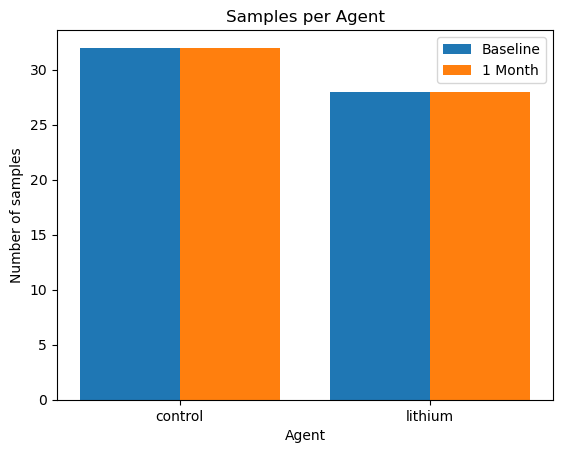

In [23]:
import matplotlib.pyplot as plt

def plot_metadata_for_classe(classe):
    X_axis = np.arange(2)
    X_keys = meta.groupby(classe).groups.keys()
    plt.bar(X_axis - 0.2, meta_baseline.groupby(classe).size(), 0.4, label = 'Baseline')
    plt.bar(X_axis + 0.2, meta_oneMonth.groupby(classe).size(), 0.4, label = '1 Month')


    plt.xticks(X_axis, X_keys)
    plt.xlabel(classe.capitalize())
    plt.ylabel("Number of samples")
    plt.title("Samples per "+ classe.capitalize())
    plt.legend()
    
plot_metadata_for_classe("agent")

baseline other
non-responder    47
responder        13
dtype: int64

1 Month other
non-responder    47
responder        13
dtype: int64


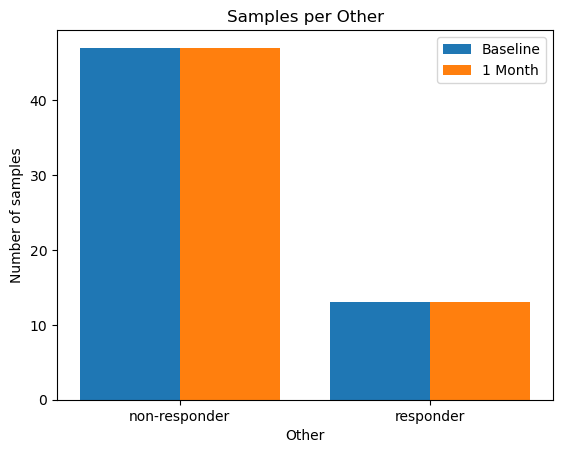

In [24]:
print_metadata_size_for_class("other")
plot_metadata_for_classe("other")

baseline time
baseline    60
dtype: int64

1 Month time
1 month    60
dtype: int64


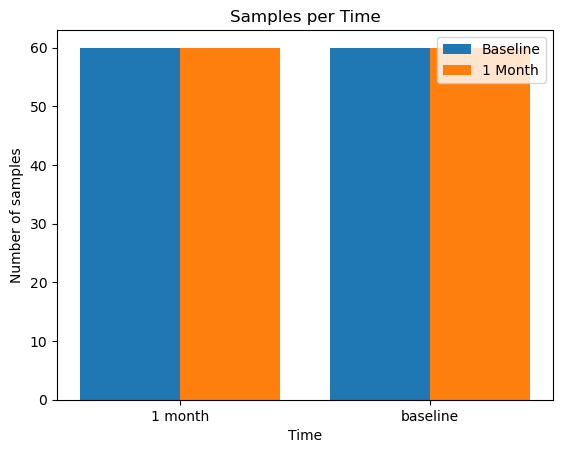

In [25]:
print_metadata_size_for_class("time")
plot_metadata_for_classe("time")


**Análise multivariada não supervisionada**

In [26]:
# pre-processamento: standardizacao dos dados
from sklearn import preprocessing

# re-escalonamento dos valores para ficarem dentro de limites normalizados 
# (distribuição normal com média 0 e variância 1) em cada variável
print("Baseline")
data_baseline_scaled = preprocessing.scale(data_baseline.values)
print("Media: ", data_baseline_scaled.mean())
print("Desvio padrao: ", data_baseline_scaled.std())

print("\n1 Month")
data_oneMonth_scaled = preprocessing.scale(data_oneMonth.values)
print("Media: ", data_oneMonth_scaled.mean())
print("Desvio padrao: ", data_oneMonth_scaled.std())

Baseline
Media:  2.97812444608816e-16
Desvio padrao:  0.9999999999999992

1 Month
Media:  3.0774219538361926e-16
Desvio padrao:  0.9999999999999998


Após 1 mês a média dos dados é ligueiramente superior aos de baseline

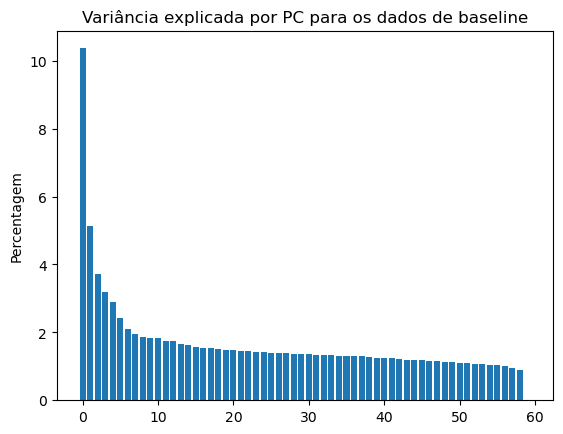

São necessários 50 componentes para explicar 90% da variabilidade dos dados.


In [27]:
from sklearn.decomposition import PCA
# Redução de dimensionalidade
# número de componentes para manter
n_components = 60
baseline_pca = PCA(n_components=n_components)

# Ajustar o PCA aos dados escalados
baseline_pca.fit(data_baseline_scaled)
# Transformar os dados usando as componentes principais
x_baseline_reduced = baseline_pca.transform(data_baseline_scaled)

plt.bar(range(n_components), baseline_pca.explained_variance_ratio_*100)
plt.title("Variância explicada por PC para os dados de baseline")
plt.ylabel("Percentagem")
plt.show()

# determinar o número de componentes principais necessários para explicar 90% da variabilidade dos dados
explained_variance = np.cumsum(baseline_pca.explained_variance_ratio_)
n_components = np.where(explained_variance >= 0.90)[0][0] + 1
print(f'São necessários {n_components} componentes para explicar 90% da variabilidade dos dados.')

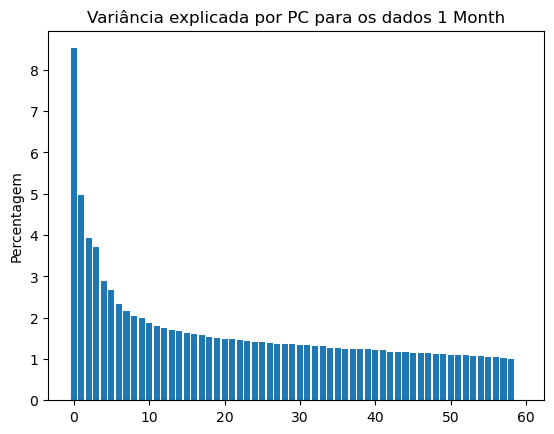

São necessários 50 componentes para explicar 90% da variabilidade dos dados.


In [28]:
from sklearn.decomposition import PCA
# Redução de dimensionalidade
# número de componentes para manter
n_components = 60
oneMonth_pca = PCA(n_components=n_components)

# Ajustar o PCA aos dados escalados
oneMonth_pca.fit(data_oneMonth_scaled)
# Transformar os dados usando as componentes principais
x_oneMonth_reduced = oneMonth_pca.transform(data_oneMonth_scaled)

plt.bar(range(n_components), oneMonth_pca.explained_variance_ratio_*100)
plt.title("Variância explicada por PC para os dados 1 Month")
plt.ylabel("Percentagem")
plt.show()

# determinar o número de componentes principais necessários para explicar 90% da variabilidade dos dados
explained_variance = np.cumsum(oneMonth_pca.explained_variance_ratio_)
n_components = np.where(explained_variance >= 0.90)[0][0] + 1
print(f'São necessários {n_components} componentes para explicar 90% da variabilidade dos dados.')

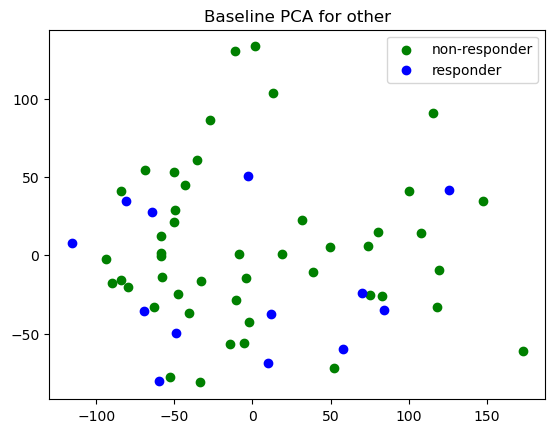

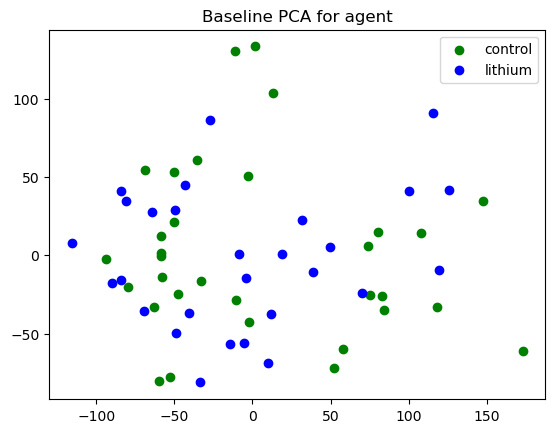

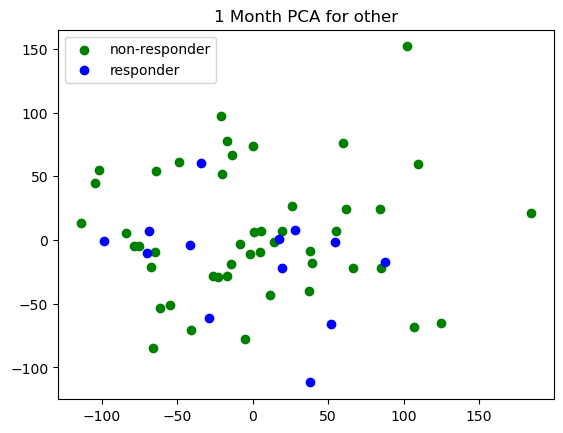

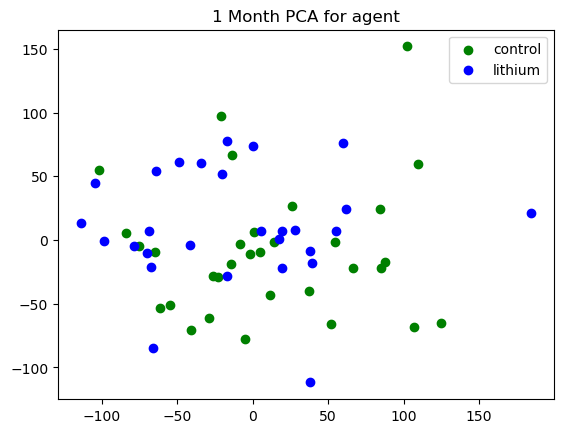

In [29]:
# Desenhar um grafico scatter para mostrar cada uma das 2 classes com diferentes cores
def drawPlot(x_reduced, meta, title):
    for class_name in ['other','agent']:
        output_data = meta[class_name].values
        plt.figure()
        for c, name in zip("gb", meta[class_name].unique()):
            plt.scatter(x_reduced[output_data == name, 0], x_reduced[output_data == name, 1], c=c, label=name)
        plt.legend()
        plt.title(title + ' PCA for '+ class_name)
        plt.show()

drawPlot(x_baseline_reduced, meta_baseline, 'Baseline')
drawPlot(x_oneMonth_reduced, meta_oneMonth, '1 Month')

**Clustering hierarquico dos dados, utilizando a métrica de distância "Manhattan”**

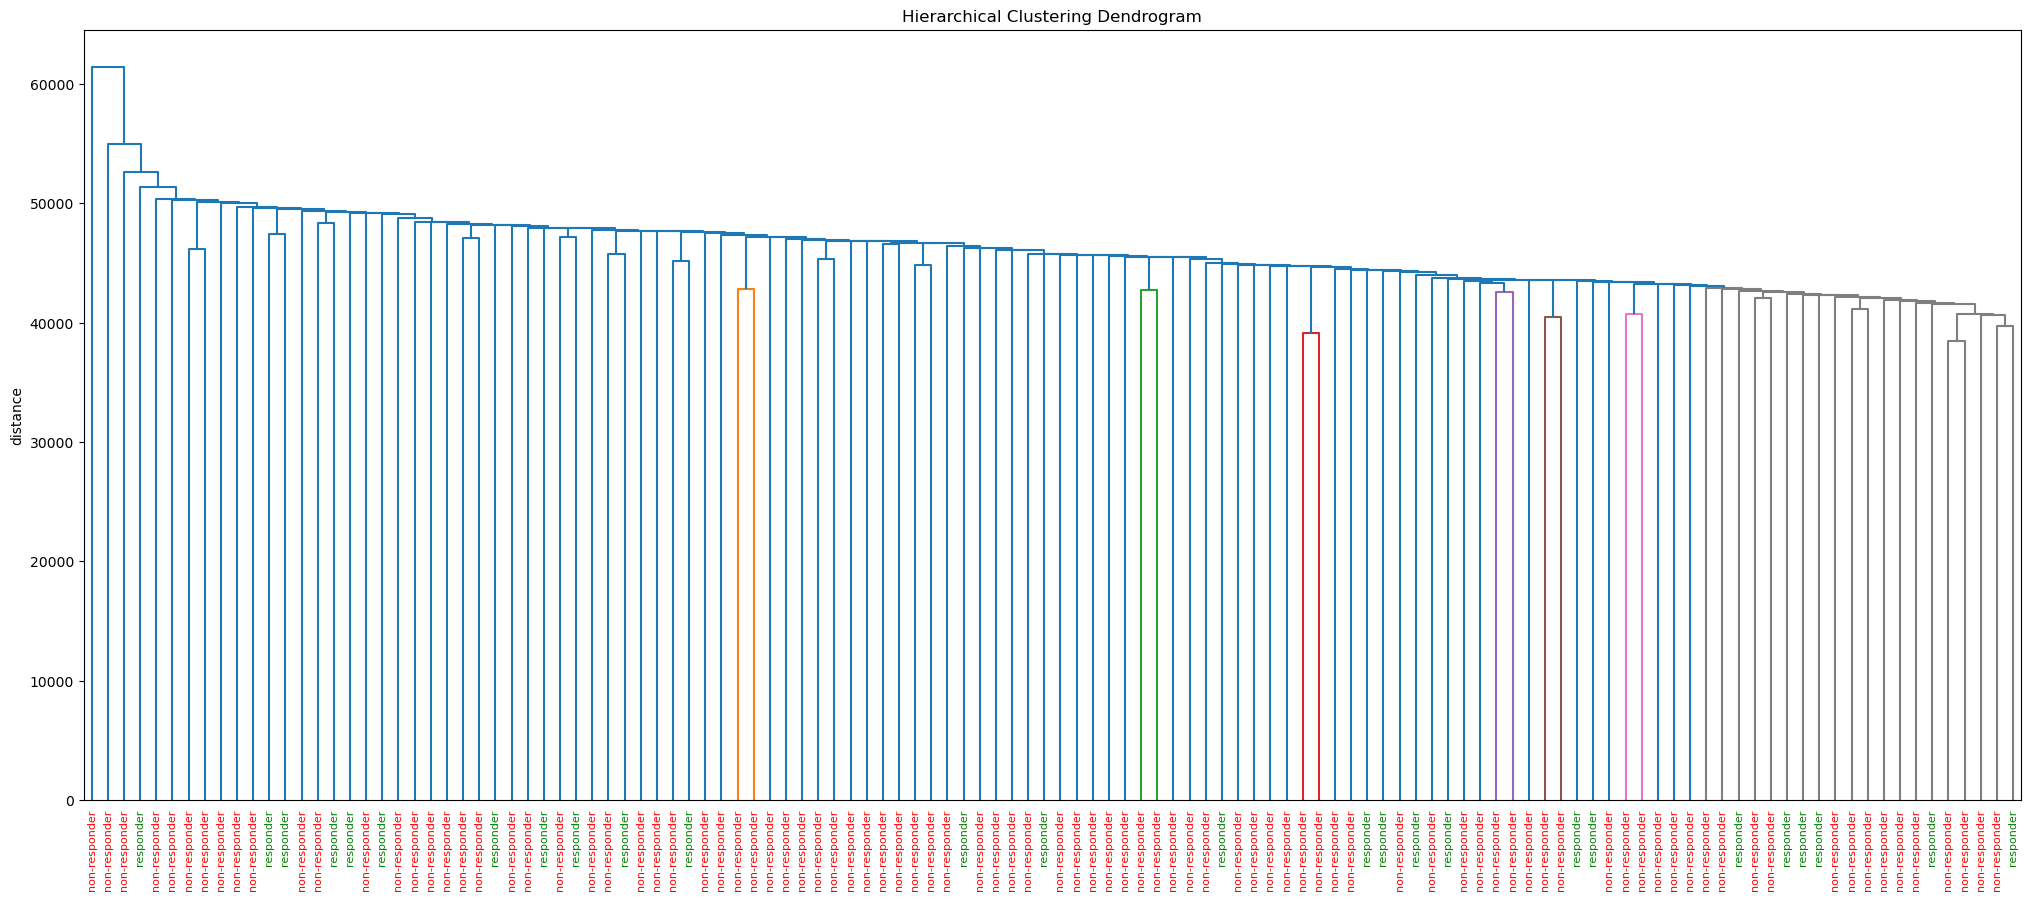

In [30]:
classe = 'other'

data_combined = np.concatenate((data_oneMonth_scaled, data_baseline_scaled))

Z = linkage(data_combined, metric='cityblock')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels=list(meta[classe]),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')

# Assignment of colors to labels: 'r' is red, 'g' is green, etc.
label_colors = {'non-responder': 'r', 'responder': 'g'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])
plt.show()

In [31]:
# clustering hierarquico
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

k=2
hclust_b = AgglomerativeClustering(n_clusters=k, affinity="manhattan", linkage="single")
hclust_b.fit(data_baseline_scaled)

output_b = meta_baseline[classe].values
res_hc_b = hclust_b.labels_
print("Baseline")
print(pd.crosstab(output_b, res_hc_b))

hclust_m = AgglomerativeClustering(n_clusters=k, affinity="manhattan", linkage="single")
hclust_m.fit(data_oneMonth_scaled)

output_m = meta_oneMonth[classe].values
res_hc_m = hclust_m.labels_
print("\n1 Month")
print(pd.crosstab(output_m, res_hc_m))

Baseline
col_0           0  1
row_0               
non-responder  46  1
responder      13  0

1 Month
col_0           0  1
row_0               
non-responder  46  1
responder      13  0


Todos os indivíduos classificados como "responder" foram agrupados no cluster 0. 
Já os indivíduos classificados como "non-responder" estão maioritariamente no cluster 0 (46 dos 47 indivíduos), com 1 indivíduo agrupado no cluster 1.

**Clustering k-means**

In [32]:
from sklearn.cluster import KMeans
import pandas as pd

# clustering k-means aos dados do baseline
k = 2
kmeans = KMeans(n_clusters=k, max_iter=1000)
kmeans.fit(data_baseline_scaled)
print("Baseline")
print(pd.crosstab(kmeans.labels_, meta_baseline[classe], rownames=['clusters'] ))

# clustering k-means aos dados oneMonth
kmeans = KMeans(n_clusters=k, max_iter=1000)
kmeans.fit(data_oneMonth_scaled)
print("\n1 Month")
print(pd.crosstab(kmeans.labels_, meta_oneMonth[classe], rownames=['clusters'] ))

Baseline
other     non-responder  responder
clusters                          
0                    14          4
1                    33          9

1 Month
other     non-responder  responder
clusters                          
0                    28          7
1                    19          6


Podemos ver que a distribuição de indivíduos em cada cluster muda entre o baseline e um mês depois. 
No entendo, observamos que sempre que corremos o K-Means obtemos valores diferentes, isto deve-se al facto de o K-Means ser um algoritmo de clustering baseado em algoritmos probabilísticos, o que significa que o resultado do clustering pode variar em cada execução, mesmo com o mesmo conjunto de dados. Isto ocorre porque o K-Means inicia as centroides (pontos que representam os clusters) de forma aleatória. Se as centroides são inicializadas de forma diferente, o resultado final do clustering pode ser diferente.

**Estratégias de filtragem dos dados**

- **Por variabilidade**

In [33]:
# Remover genes que variam pouco
from sklearn.feature_selection import VarianceThreshold

# Remover todas as colunas (genes) que possuem uma variabilidade menor ou igual a 0.5
var_threshold_b = VarianceThreshold(threshold=0.5)
x_high_variance_b = var_threshold_b.fit_transform(data_baseline)

print("Baseline\n", x_high_variance_b.shape)
x_high_variance_b = pd.DataFrame(x_high_variance_b)
x_high_variance_b.columns = var_threshold_b.get_feature_names_out()
x_high_variance_b.head()

Baseline
 (60, 327)


,ILMN_1652199,ILMN_1652431,ILMN_1653652,ILMN_1653871,ILMN_1654118,ILMN_1654875,ILMN_1655710,ILMN_1657871,ILMN_1658624,ILMN_1659405,...,ILMN_3290019,ILMN_3290577,ILMN_3291511,ILMN_3293676,ILMN_3296994,ILMN_3299955,ILMN_3304003,ILMN_3305475,ILMN_3305993,ILMN_3307868
0,10.82930,10.51710,9.28570,12.5093,12.8450,11.0278,9.44387,9.27634,11.5092,10.49540,...,9.16079,10.8414,7.88528,11.5786,9.33181,13.8890,8.77605,7.92924,8.71350,9.37796
1,13.26490,8.58741,9.13807,12.7301,12.6377,11.0740,10.10330,7.34406,11.4054,10.70320,...,7.84241,10.9972,7.61281,11.5878,8.09319,12.6102,9.48124,8.64210,8.67663,9.72430
2,10.50040,10.21630,7.43778,10.0878,13.3705,11.2281,10.57430,7.43964,13.0766,11.04250,...,8.44771,11.7164,7.61343,12.2095,8.67943,12.7892,9.83340,8.46379,10.42500,7.66534
3,10.81720,7.23385,8.99304,11.8754,11.1987,11.6116,10.05480,7.94402,10.8352,10.53820,...,9.55769,11.2440,8.28978,11.8055,10.01280,14.1908,8.56756,8.27522,8.20500,8.51338
4,8.96755,11.68570,8.45254,11.8126,13.8981,12.0149,10.34540,8.81971,12.6742,9.98116,...,9.29822,10.7653,8.17237,11.3927,9.95499,13.9289,9.42181,8.44000,10.02290,9.37231


In [34]:
# Remover todas as colunas (genes) que possuem uma variabilidade menor ou igual a 0.5
var_threshold_m = VarianceThreshold(threshold=0.5)
x_high_variance_m = var_threshold_m.fit_transform(data_oneMonth)

print("1 Month\n", x_high_variance_m.shape)
x_high_variance_m = pd.DataFrame(x_high_variance_m)
x_high_variance_m.columns = var_threshold_m.get_feature_names_out()
x_high_variance_m.head()

1 Month
 (60, 282)


,ILMN_1652199,ILMN_1652431,ILMN_1653466,ILMN_1653652,ILMN_1653871,ILMN_1654118,ILMN_1654875,ILMN_1655710,ILMN_1657871,ILMN_1658247,...,ILMN_3285762,ILMN_3287583,ILMN_3290019,ILMN_3291511,ILMN_3293676,ILMN_3296994,ILMN_3299955,ILMN_3305475,ILMN_3305993,ILMN_3307868
0,10.97770,9.86289,9.35929,7.96509,10.2143,12.6199,12.9157,10.04420,7.57522,8.26891,...,10.60170,13.0172,10.25230,8.41430,12.4194,9.98116,14.0914,8.28766,9.18863,8.58912
1,10.05910,8.50744,8.41482,7.67525,12.5735,12.6894,11.6492,9.40988,7.17915,7.92924,...,9.99114,12.6668,8.01579,7.43649,11.1009,8.27667,12.4097,8.74214,9.06071,10.61380
2,10.17540,10.23050,8.64300,7.45123,10.4335,13.8382,11.1081,9.78541,7.13159,8.38877,...,11.90430,13.5862,8.28248,7.68060,11.6199,8.51716,12.4356,8.50217,10.89400,8.43369
3,8.94712,8.17945,11.04690,7.90794,10.3515,12.2726,11.9021,11.20220,11.57540,9.73290,...,10.15030,11.7873,9.53079,8.96617,12.4076,10.66730,14.0706,8.74666,8.70335,8.47631
4,8.89225,11.23090,9.06257,7.42213,11.1207,14.2650,12.0593,10.15630,8.59645,7.37431,...,11.80550,12.8658,9.64060,8.42757,11.6959,10.15030,13.8937,8.89258,10.63370,9.28242


- **Por testes estatísticos univariados**

In [35]:
from sklearn.feature_selection import SelectKBest, f_classif

# Selecionar os 10 melhores genes 
skb_baseline = SelectKBest(f_classif, k=10)

# fit and transform data
labels = data_baseline.iloc[:,0]
x_baseline_kbest = skb_baseline.fit_transform(data_baseline.iloc[:,1:], labels)

x_baseline_kbest = pd.DataFrame(x_baseline_kbest)
x_baseline_kbest.columns = skb_baseline.get_feature_names_out()
print("Baseline")
x_baseline_kbest.head()

Baseline


,ILMN_1686957,ILMN_1763011,ILMN_1788803,ILMN_1793543,ILMN_1801428,ILMN_1806037,ILMN_2051519,ILMN_2107607,ILMN_3188593,ILMN_3275012
0,6.79301,6.93733,6.86852,6.76713,6.77757,7.05650,13.68110,6.59040,6.77795,6.77209
1,6.83848,6.89435,6.66807,6.66834,6.63592,6.95019,14.03850,6.64350,6.80934,6.92666
2,6.75064,6.68011,6.75284,6.61717,6.76708,7.14016,9.72812,6.91433,6.52194,6.89567
3,6.85752,6.64719,6.85719,6.70265,6.66969,6.98825,14.01110,6.76454,6.84957,6.90490
4,6.82871,6.89897,6.65247,6.60611,6.72857,6.93562,13.92400,6.74998,6.65621,6.76268


In [36]:
from sklearn.feature_selection import SelectKBest, f_classif

# Selecionar os 10 melhores genes 
skb_oneMonth = SelectKBest(f_classif, k=10)

# fit and transform data
labels = data_oneMonth.iloc[:,0]
x_oneMonth_kbest = skb_oneMonth.fit_transform(data_oneMonth.iloc[:,1:], labels)

x_oneMonth_kbest = pd.DataFrame(x_oneMonth_kbest)
x_oneMonth_kbest.columns = skb_oneMonth.get_feature_names_out()
print("1 Month")
x_oneMonth_kbest.head(10)

1 Month


,ILMN_1663347,ILMN_1667825,ILMN_1671372,ILMN_1747709,ILMN_1779182,ILMN_1828360,ILMN_1878885,ILMN_2051519,ILMN_3187324,ILMN_3202109
0,7.04269,11.1274,7.07851,7.02772,6.86261,6.99435,7.38705,13.82080,6.68051,6.76625
1,7.00115,11.2572,7.03064,6.94942,6.82139,7.08707,7.15205,13.91080,6.80893,6.73116
2,7.82899,10.7995,6.88038,6.96695,6.94197,6.89936,6.95462,9.29193,6.81289,6.78859
3,9.64513,11.3668,7.10324,6.92740,6.77312,6.84472,7.42803,14.16550,6.76085,6.97283
4,7.01891,11.2244,7.17065,6.94511,6.91330,7.09441,7.11374,13.46700,6.73948,6.83439
5,7.08393,11.0919,7.41433,6.94267,6.92129,7.01254,6.99851,14.13050,6.92929,6.98215
6,6.90879,11.6116,7.00975,7.06396,6.91112,7.00997,7.11817,14.19930,6.79183,6.87998
7,6.92174,11.2267,7.01305,6.92150,6.72389,7.03693,7.50345,14.28410,6.85623,6.78273
8,7.05075,10.6414,7.58319,7.00003,6.88594,7.44440,7.21288,14.01650,6.84484,6.92347
9,7.07488,11.0886,6.90763,6.97419,6.86668,6.94533,7.41433,13.51380,6.74569,6.77162


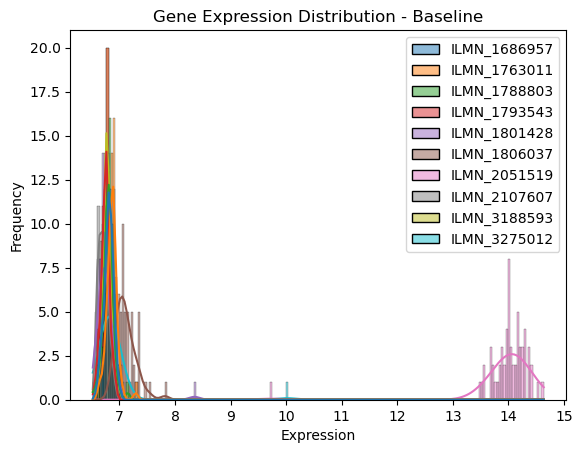

In [37]:
import seaborn as sns

# Criar histogramas dos dados 
sns.histplot(x_baseline_kbest, kde=True)
plt.xlabel('Expression')
plt.ylabel('Frequency')
plt.title('Gene Expression Distribution - Baseline')
plt.show()

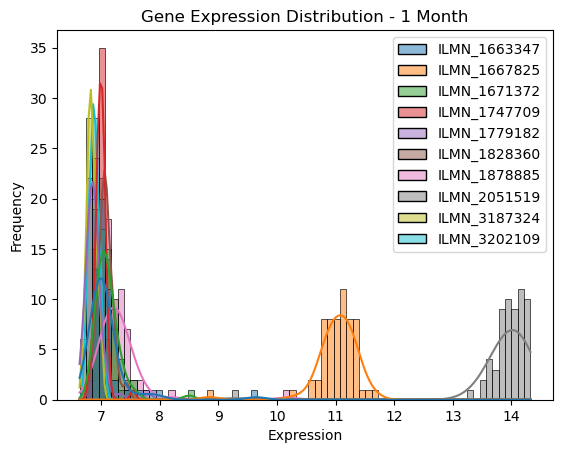

In [38]:
# Criar histogramas dos dados de 1 mês
sns.histplot(x_oneMonth_kbest, kde=True)
plt.xlabel('Expression')
plt.ylabel('Frequency')
plt.title('Gene Expression Distribution - 1 Month')
plt.show()

**Teste ANOVA para comparar as médias dos dois conjuntos de dados e determinar se há diferenças significativas**

In [39]:
from scipy import stats

# comparar a média de expressão gênica entre as amostras de baseline e após 1 mês
f_val, p_val = stats.f_oneway(data_baseline, data_oneMonth)

# O valor comum para determinar se há diferenças significativas é 0,05
differentially_expressed_genes = data_baseline.columns[p_val < 0.05]

print(differentially_expressed_genes.shape)
print("Genes diferencialmente expressos entre amostras de baseline e após 1 mês:", differentially_expressed_genes)


(1953,)
Genes diferencialmente expressos entre amostras de baseline e após 1 mês: Index(['ILMN_1651260', 'ILMN_1651396', 'ILMN_1651597', 'ILMN_1651752',
       'ILMN_1651787', 'ILMN_1652015', 'ILMN_1652199', 'ILMN_1652392',
       'ILMN_1652429', 'ILMN_1652472',
       ...
       'ILMN_3310361', 'ILMN_3310396', 'ILMN_3310401', 'ILMN_3310406',
       'ILMN_3310461', 'ILMN_3310583', 'ILMN_3310860', 'ILMN_3310940',
       'ILMN_3311000', 'ILMN_3311150'],
      dtype='object', length=1953)


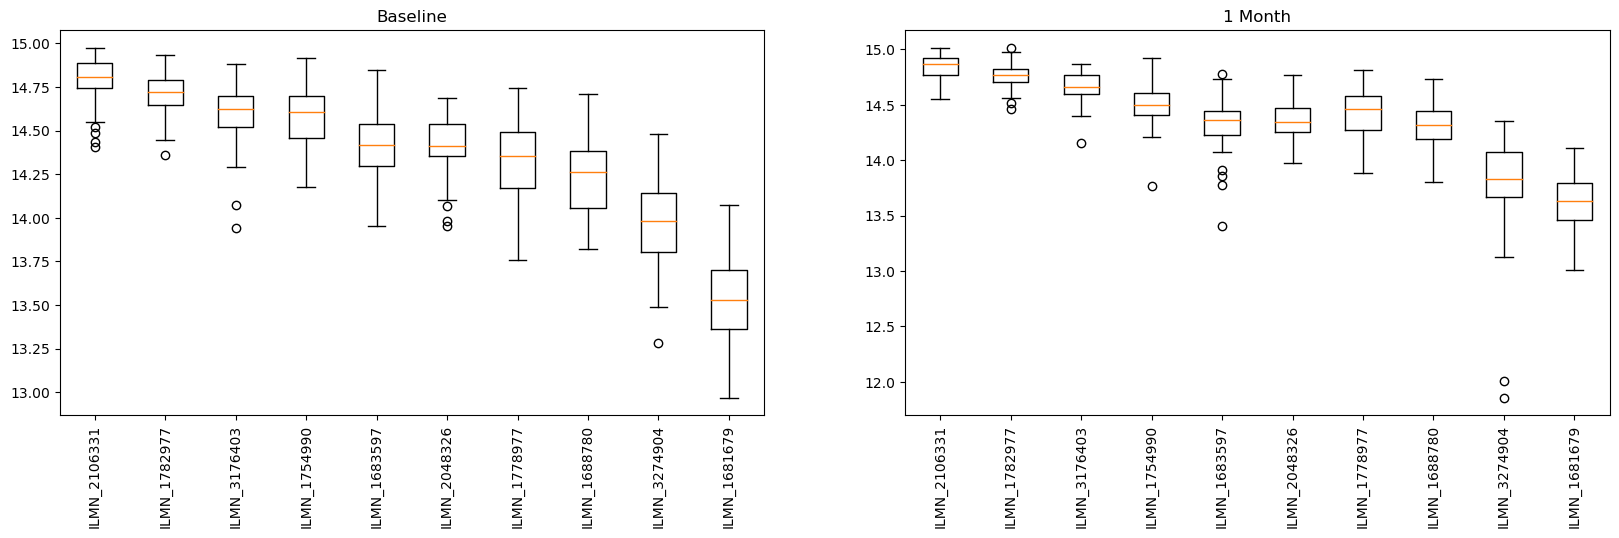

In [40]:
# ordenar as expressões geneticas para cada gene
data_baseline_genes = data_baseline[differentially_expressed_genes].mean().sort_values(ascending=False)
data_oneMonth_genes = data_oneMonth[differentially_expressed_genes].mean().sort_values(ascending=False)

# selecionar as primeiras entradas com maior expressão
top_genes = data_baseline_genes.index[:10]

data_baseline_top = data_baseline[top_genes]
data_oneMonth_top = data_oneMonth[top_genes]

fig, ax = plt.subplots(1,2, figsize=(20, 5))
ax[0].boxplot(data_baseline_top)
ax[0].set_title('Baseline')
ax[0].set_xticklabels(data_baseline_top.columns, rotation=90)
ax[1].boxplot(data_oneMonth_top)
ax[1].set_title('1 Month')
ax[1].set_xticklabels(data_oneMonth_top.columns, rotation=90)
plt.show()


Podemos observar que existem genes com uma diferença significativa na expressão genética entre as amostras de baseline e após 1 mês.
Na maioria dos genes observamos que a caixa de expressão genética do gene na amostra após 1 mês é menor do que na amostra baseline, o que pode indicar uma expressão genética diminuída do gene após o tratamento com lítio.
No entanto, observamos que no gene ILMN_2048326 a caixa de expressão genética na amostra após 1 mês é maior do que na amostra de baseline, o que pode indicar uma expressão genética aumentada do gene após o tratamento com lítio.